# Series Temporales

Las series temporales son una serie de eventos ordenados con respecto del **tiempo** y esta en funcion de la misma serie; 
por ejemplo el precio de la bolsa de valores del dia de hoy esta relacionada con su precio del dia de ayer,los enfermos de covid durante unos meses, el creciemiento de la economia, etc.

La serie temporal puede descomponerse en 4 componentes:
   + La media 
   + La estacionalidad  - o ciclo
   + La tendencia
   + El ruido - que es una variable random en nuestros datos 

Podemos usar de la libreria *statsmodels* la funcion *seasonal_decompose* que nos permite plotear su descomposicion

Al trabajar con una serie temporal tenemos en python tenermos que tener el indice como con formato date para poder manipular la serie

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

In [2]:
occupancy = pd.read_csv('data/occupancy.csv')
occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2659,5/24/2015 9:00,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2660,5/24/2015 10:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2661,5/24/2015 11:00,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2662,5/24/2015 12:00,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [3]:
occupancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
date             2664 non-null object
Temperature      2664 non-null float64
Humidity         2664 non-null float64
Light            2664 non-null float64
CO2              2664 non-null float64
HumidityRatio    2664 non-null float64
Occupancy        2664 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


In [5]:
occupancy['date'] = pd.to_datetime(occupancy['date'], format = '%m/%d/%Y %H:%M')

In [6]:
occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:00:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,2015-02-02 15:00:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,2015-02-02 16:00:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,2015-02-02 17:00:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,2015-02-02 18:00:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2659,2015-05-24 09:00:00,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2660,2015-05-24 10:00:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2661,2015-05-24 11:00:00,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2662,2015-05-24 12:00:00,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [7]:
occupancy.set_index('date', inplace = True)
occupancy

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:00:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2015-05-24 09:00:00,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2015-05-24 10:00:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2015-05-24 11:00:00,24.330000,25.700000,817.000000,1125.800000,0.004841,1


<AxesSubplot:xlabel='date'>

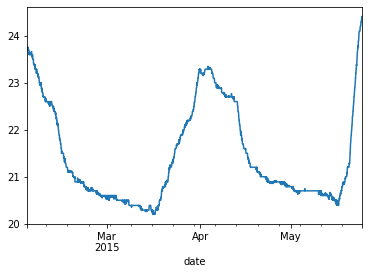

In [8]:
occupancy['Temperature'].plot()

<AxesSubplot:xlabel='date'>

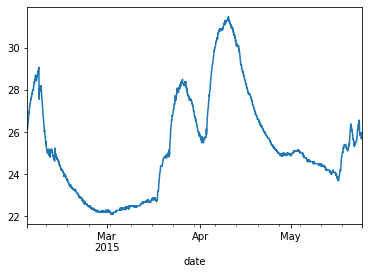

In [9]:
occupancy['Humidity'].plot()

In [10]:
dias = occupancy.loc['2015-4-1':'2015-4-15', 'Temperature']

In [11]:
dias

date
2015-04-01 00:00:00    23.260
2015-04-01 01:00:00    23.272
2015-04-01 02:00:00    23.245
2015-04-01 03:00:00    23.290
2015-04-01 04:00:00    23.245
                        ...  
2015-04-15 19:00:00    21.600
2015-04-15 20:00:00    21.600
2015-04-15 21:00:00    21.600
2015-04-15 22:00:00    21.600
2015-04-15 23:00:00    21.600
Name: Temperature, Length: 360, dtype: float64

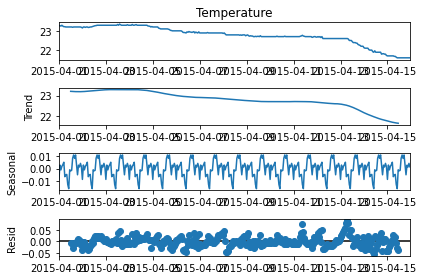

In [12]:
import statsmodels.api as sm

res=sm.tsa.seasonal_decompose(dias)

resplot=res.plot()

### Autoregresión

El modelo usa la relación de dependencia del momento actual con $n$ momentos anteriores. Es, en realidad, una regresión lineal.

$$y_t = \beta_0+\beta_1y_{t-1}+\beta_2y_{t-2}+\ldots+\beta_ny_{t-n}+\epsilon_t$$

Si solamente nos fijamos en el momento anterior, $t-1$, entonces:

$$y_t = \beta_0+\beta_1y_{t-1}+\epsilon_t$$

Es la llamada Cadena de Markov

In [13]:
from pandas.plotting import lag_plot

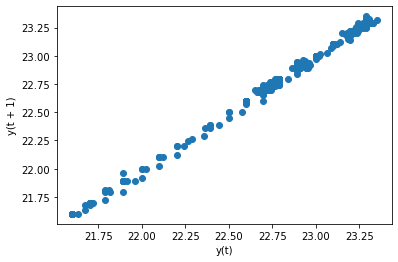

In [15]:
lag_plot(dias);

In [16]:
from statsmodels.tsa.ar_model import AR

In [17]:
train, test = occupancy.Temperature[:-10],occupancy.Temperature[-10:]

In [21]:
occupancy.index.isnull().sum()

0

In [22]:
modelo=AR(train).fit()

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, 

In [27]:
pred = modelo.predict(len(train), len(occupancy['Temperature'])-1)


In [28]:
pred

2015-05-24 04:00:00    24.231775
2015-05-24 05:00:00    24.244921
2015-05-24 06:00:00    24.266124
2015-05-24 07:00:00    24.276668
2015-05-24 08:00:00    24.291514
2015-05-24 09:00:00    24.307918
2015-05-24 10:00:00    24.321541
2015-05-24 11:00:00    24.335426
2015-05-24 12:00:00    24.355126
2015-05-24 13:00:00    24.370226
Freq: H, dtype: float64

In [30]:
test

date
2015-05-24 04:00:00    24.200000
2015-05-24 05:00:00    24.218000
2015-05-24 06:00:00    24.260000
2015-05-24 07:00:00    24.290000
2015-05-24 08:00:00    24.290000
2015-05-24 09:00:00    24.290000
2015-05-24 10:00:00    24.330000
2015-05-24 11:00:00    24.330000
2015-05-24 12:00:00    24.356667
2015-05-24 13:00:00    24.408333
Name: Temperature, dtype: float64

In [31]:
error=sum((pred-test).abs())/len(test)
error #erro medio absoluto

0.015111852761156896

In [32]:
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

,real,pred,diff
2015-05-24 04:00:00,24.200000,24.231775,0.031775
2015-05-24 05:00:00,24.218000,24.244921,0.026921
2015-05-24 06:00:00,24.260000,24.266124,0.006124
2015-05-24 07:00:00,24.290000,24.276668,-0.013332
2015-05-24 08:00:00,24.290000,24.291514,0.001514
2015-05-24 09:00:00,24.290000,24.307918,0.017918
2015-05-24 10:00:00,24.330000,24.321541,-0.008459
2015-05-24 11:00:00,24.330000,24.335426,0.005426
2015-05-24 12:00:00,24.356667,24.355126,-0.001541
2015-05-24 13:00:00,24.408333,24.370226,-0.038108


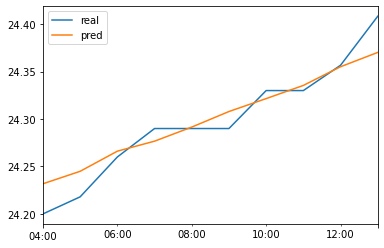

In [33]:
res[['real','pred']].plot();

### Media Móvil (Moving Average MA)

Una manera matemática de expresar la MA puede ser:


$$y_t = \beta_0+\epsilon_t+\epsilon_{t-1}\phi_{t-1}+\epsilon_{t-2}\phi_{t-2}+\ldots+\epsilon_{t-n}\phi_{t-n}$$


Se usa la relación entre las observaciones y el error residual de la media móvil.

Otra es la evidente, la media móvil, se muestra en el gráfico.

In [34]:
from statsmodels.tsa.arima_model import ARMA

In [37]:
model = ARMA(occupancy.Temperature, order=(5, 1))
#modelo de autoregresion con 20 rezagos con 1 media movil
model_fit = model.fit(disp=False)

pred = model_fit.predict(len(train), len(occupancy['Temperature'])-1)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [38]:
pred

2015-05-24 04:00:00    24.231941
2015-05-24 05:00:00    24.230169
2015-05-24 06:00:00    24.239128
2015-05-24 07:00:00    24.268506
2015-05-24 08:00:00    24.300284
2015-05-24 09:00:00    24.313970
2015-05-24 10:00:00    24.317578
2015-05-24 11:00:00    24.341232
2015-05-24 12:00:00    24.350906
2015-05-24 13:00:00    24.371775
Freq: H, dtype: float64

In [39]:
error=sum((pred-test).abs())/len(test)
error #erro medio absoluto

0.018670336630829353

In [43]:
df_final = pd.DataFrame({'observed':test, 'predicted':pred})

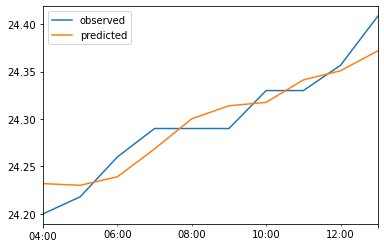

In [44]:
df_final.plot();

In [48]:
from statsmodels.tsa.stattools import adfuller
#Para adFuller tratamos de no rechazar hipotesis nula
#Es decir que existe raiz unitaria o que es estacionaria nuestra serie

In [47]:
dftest = adfuller(train) #segundo valor de resultados es el p_value
dftest

(-1.9595838601677376,
 0.3045703312429312,
 26,
 2627,
 {'1%': -3.432841702058772,
  '5%': -2.8626408441287974,
  '10%': -2.5673560179979247},
 -12496.792051208671)

In [51]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [52]:
data = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

<AxesSubplot:xlabel='Month'>

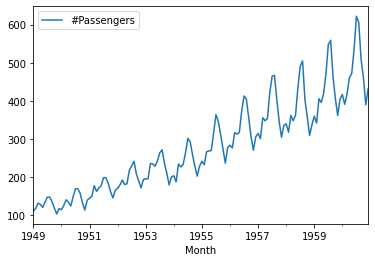

In [54]:
data.plot()

In [56]:
import numpy as np

In [58]:
ts = data['#Passengers']

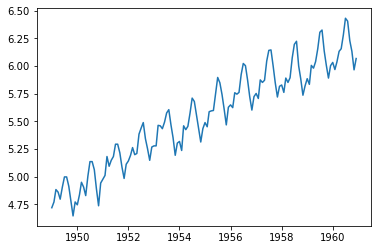

In [59]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [60]:
moving_avg = ts_log.rolling(12).mean()
moving_avg

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    6.124517
1960-09-01    6.132246
1960-10-01    6.142628
1960-11-01    6.148837
1960-12-01    6.154215
Name: #Passengers, Length: 144, dtype: float64

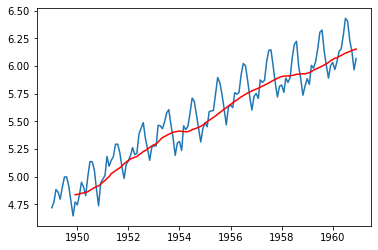

In [61]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [62]:
moving_std = ts_log.rolling(12).std()
moving_std

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.171453
1960-09-01    0.174172
1960-10-01    0.169804
1960-11-01    0.160923
1960-12-01    0.156660
Name: #Passengers, Length: 144, dtype: float64

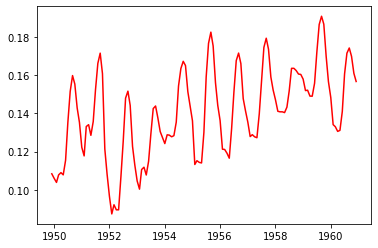

In [64]:

plt.plot(moving_std, color='red')

In [68]:
def test_stationarity(timeseries):
    
    #Determing rolling 
    rol_mean = timeseries.rolling(12).mean()
    rol_std = timeseries.rolling(12).std()
    
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rol_mean, color = 'red',label = 'mean')
    std = plt.plot(rol_std, color = 'green',label = 'std')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and STD')
    plt.show();
    
    print('Resultados ADFuller:')
    
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [69]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

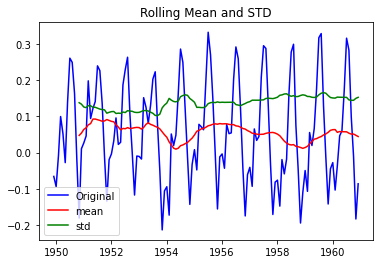

Resultados ADFuller:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [70]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

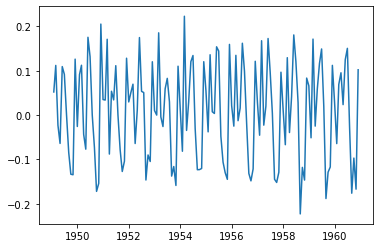

In [72]:
ts_log_diff = ts_log - ts_log.shift() #AR de un solo grado
plt.plot(ts_log_diff);

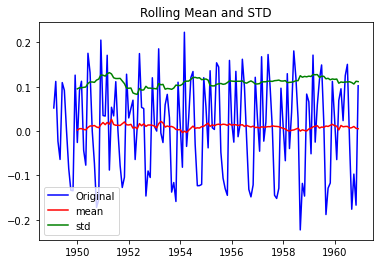

Resultados ADFuller:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [73]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [74]:
from statsmodels.tsa.arima_model import ARIMA

In [75]:
model = ARIMA(ts_log, order=(2, 1, 2))
#order recibe para el casod e ARIMA (rezagos,nivel integracion,media moviles) 
results_ARIMA = model.fit(disp=-1)  

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was p

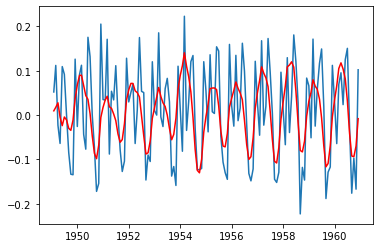

In [76]:
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [77]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [78]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [82]:
ts_log.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [79]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


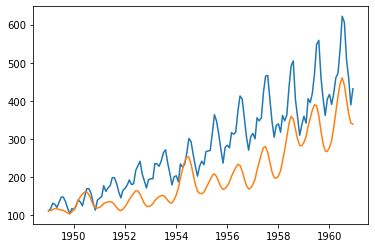

In [80]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)

# PCA

**PCA** es una transformación lineal usada para reducir dimensiones en los datos.

¿Por qué reducir dimensiones?

Existen varias razones, entre ellas:
+ Mejora de la performance
+ Mejor manejo de la dispersión de los datos
+ Maldición de las dimensiones (ojo-también existe la bendición)
+ etc...


Hay dos maneras diferentes de hacer ésta transformación:

+ A través de la matriz de correlaciones (dimensiones no homogéneas)
+ A través de la matriz de covarianzas (dimensiones homogéneas)

Ambas matrices son simétricas y diagonalizables. De hecho, el Teorema Espectral dice que si una matriz es hermítica, cuadrada y de dimensión finita, entonces existe una base de vectores propios donde dicha matriz puede ser representada.
Esto quiere decir que podemos cambiar de base para después proyectar, reduciendo las dimensiones e intentando conservar la máxima información en el nuevo subespacio.

![gio1](data/gioconda.jpeg)
![gio2](data/gioconda_lego.png)

![](data/pca_1.png)

![](data/pca.png)

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalización
from sklearn import datasets
from sklearn.decomposition import PCA    # PCA

import warnings
warnings.simplefilter('ignore')

In [87]:
df=pd.read_csv('data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [88]:
data=df.drop(columns=['variety'])
data.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
obj=df['variety']

In [90]:
x=StandardScaler().fit_transform(data)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [91]:
pd.DataFrame(x)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [92]:
pca_ej = PCA(n_components = 2)
pc = pca_ej.fit_transform(x)
pdf = pd.DataFrame(pc, columns = ['PC1','PC2'])

In [95]:
pca_ej.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [96]:
pdf

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


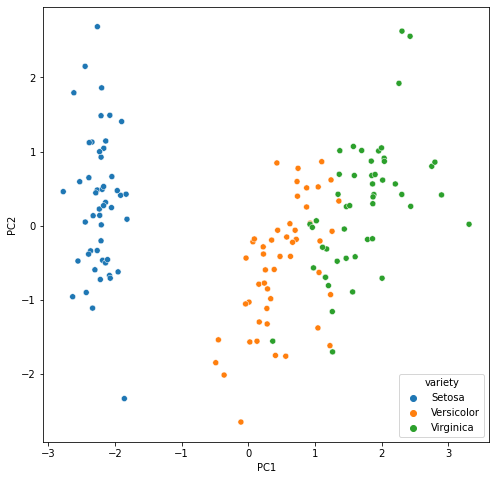

In [94]:
fig  = plt.figure(figsize=(8,8))
sns.scatterplot(pdf['PC1'],pdf['PC2'],hue=obj);

In [97]:
data=pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [106]:
target=data['target_class']

In [99]:
data_n=StandardScaler().fit_transform(data)
data_n

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.07279778,
        -0.28743812, -0.31749915],
       [-0.3341682 ,  1.80226533, -0.01178476, ...,  0.50442694,
         0.21158145, -0.31749915],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.12599609,
        -0.39137346, -0.31749915],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ..., -1.28807874,
        -0.94133005, -0.31749915],
       [ 0.13362759,  1.07450972, -0.26005007, ...,  0.37825656,
         0.27584987, -0.31749915],
       [-2.10576204,  5.73546965,  0.87267394, ..., -2.19732744,
        -0.97105168, -0.31749915]])

In [100]:
pca=PCA(n_components = 2) #DEfinimos una reduccion  de dimensiones a 2

pca.fit(data_n)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [101]:
df=pd.DataFrame(pca.fit_transform(data_n))

df.head()

,0,1
0,-1.362029,-1.147576
1,-1.056973,-0.111716
2,0.066162,0.344042
3,-1.125718,-1.368555
4,-0.774339,2.131908


In [107]:
target

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target_class, Length: 17898, dtype: int64

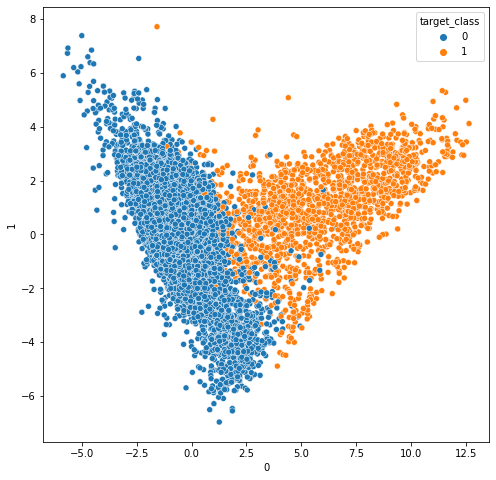

In [109]:
fig  = plt.figure(figsize=(8,8))
sns.scatterplot(df[df.columns[0]],df[df.columns[1]],hue=target);